In [38]:
import numpy as np
from scipy.ndimage import rotate, map_coordinates

def translate_jet_image(image):
    """Translate the jet image so that the leading subjet is at (eta, phi) = (0, 0).
    The pixel intensity is modified to be transverse energy pT instead of E, to
    be invariant under translations in eta."""
   # eta, phi = np.indices(numpy_image.shape)
    eta, phi = np.indices(numpy_image.shape[:2])
 
    eta -= np.argmax(image) // numpy_image.shape[1]
    cosh_eta = np.cosh(eta)
    pT = image / cosh_eta[:,:,np.newaxis]

  
 # plot the original and translated images side-by-side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(numpy_image, cmap='jet')
    ax1.set_title('Original Image')
    ax2.imshow(pT, cmap='jet')
    ax2.set_title('Translated Image')
    plt.show()
    
    return pT

def rotate_jet_image(image):
    """Rotate the jet image so that the second subjet is at -pi/2 or the first
    principle component is aligned with the vertical axis if no second subjet.
    The rotated grid is interpolated using cubic splines to redistribute the
    energy amongst the original grid."""
    # Determine rotation angle based on the location of the second subjet
    center = np.array([(np.max(eta) + np.min(eta)) / 2, (np.max(phi) + np.min(phi)) / 2])
    subjet1 = np.unravel_index(np.argmax(image), image.shape)
    subjet2 = None
    for idx, val in np.ndenumerate(image):
        if idx == subjet1:
            continue
        if subjet2 is None or val > image[subjet2]:
            subjet2 = idx
    if subjet2 is None:
        rotation_angle = np.arctan2(*np.linalg.eigvalsh(np.cov(np.transpose(np.where(image > np.max(image) * 0.1)))))
    else:
        rotation_angle = np.arctan2(subjet2[1] - subjet1[1], subjet2[0] - subjet1[0]) - np.pi / 2
    # Rotate the image and interpolate to the original grid
    rotated_image = rotate(image, np.degrees(rotation_angle), reshape=False, order=3)
    coords = np.indices(image.shape) - center[:, None, None]
    rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                                [np.sin(rotation_angle), np.cos(rotation_angle)]])
    coords = np.einsum('ij,klj->kil', rotation_matrix, coords)
    coords += center[:, None, None]
    return map_coordinates(rotated_image, coords)

def parity_flip_jet_image(image):
    """Flip the jet image along the vertical axis so that the right side has the
    highest sum pixel intensity."""
    flip_axis = 1 if np.sum(image[:, :image.shape[1]//2]) < np.sum(image[:, image.shape[1]//2:]) else 0
    return np.flip(image, axis=flip_axis)


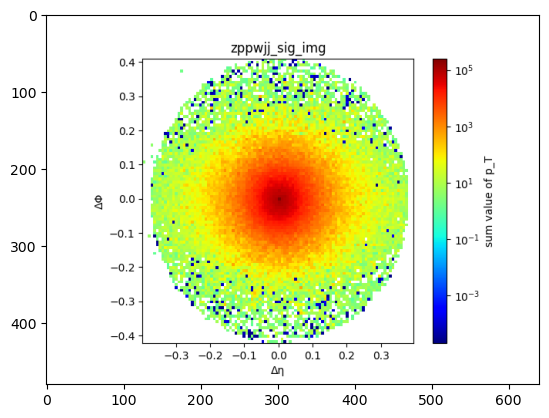

In [28]:
from PIL import Image
import numpy as np

# Load the image as a PIL Image object
image_path = '/home/abhishek/Downloads/jet_image.png'
image = Image.open(image_path)

# Convert the PIL Image object to a NumPy array
numpy_image = np.array(image)

# Display the image (optional)
import matplotlib.pyplot as plt
plt.imshow(numpy_image)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


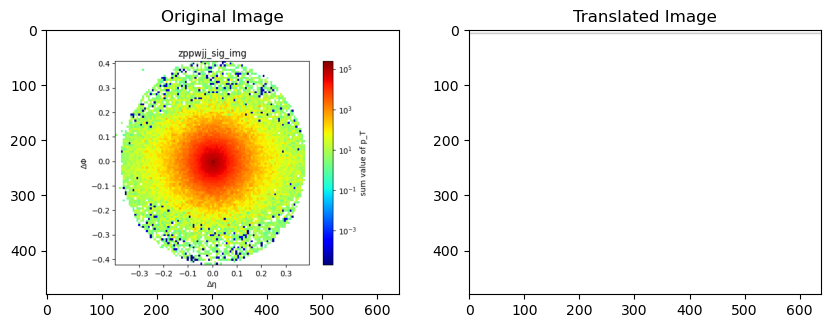

In [39]:

pT_image = translate_jet_image(image)
#rotated_image = rotate_jet_image(pT_image)
#final_image = parity_flip_jet_image(rotated_image)


In [36]:
pT_image


array([[[2.55000000e+002, 2.55000000e+002, 2.55000000e+002,
         2.55000000e+002],
        [2.55000000e+002, 2.55000000e+002, 2.55000000e+002,
         2.55000000e+002],
        [2.55000000e+002, 2.55000000e+002, 2.55000000e+002,
         2.55000000e+002],
        ...,
        [2.55000000e+002, 2.55000000e+002, 2.55000000e+002,
         2.55000000e+002],
        [2.55000000e+002, 2.55000000e+002, 2.55000000e+002,
         2.55000000e+002],
        [2.55000000e+002, 2.55000000e+002, 2.55000000e+002,
         2.55000000e+002]],

       [[1.65253840e+002, 1.65253840e+002, 1.65253840e+002,
         1.65253840e+002],
        [1.65253840e+002, 1.65253840e+002, 1.65253840e+002,
         1.65253840e+002],
        [1.65253840e+002, 1.65253840e+002, 1.65253840e+002,
         1.65253840e+002],
        ...,
        [1.65253840e+002, 1.65253840e+002, 1.65253840e+002,
         1.65253840e+002],
        [1.65253840e+002, 1.65253840e+002, 1.65253840e+002,
         1.65253840e+002],
        [1.6525

In [37]:
plt.show()

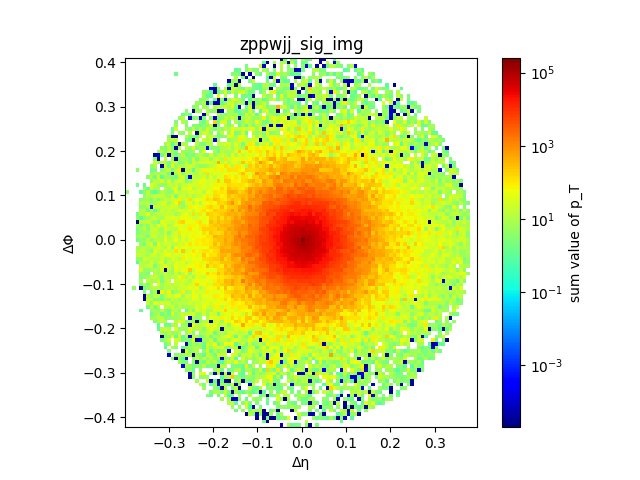

In [30]:
image

In [24]:
print(numpy_image.shape)


(480, 640, 4)


In [25]:
numpy_image

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [43]:
import numpy as np
from skimage import transform
def translate(jet_csts, subjets):
    """Translate constituents and jets, leading subjet at (eta, phi) = (0, 0).
    """
    # Translate constituents
    jet_csts['eta'] -= subjets['eta'][0]
    jet_csts['phi'] -= subjets['phi'][0]
    # Ensure phi in [-pi, pi]
    jet_csts['phi'] = np.mod(jet_csts['phi'] + np.pi, 2*np.pi) - np.pi
    # Translate jets
    subjets['eta'] -= subjets['eta'][0]
    subjets['phi'] -= subjets['phi'][0]
    # Ensure phi in [-pi, pi]
    subjets['phi'] = np.mod(subjets['phi'] + np.pi, 2*np.pi) - np.pi
def pixel_edges(jet_size=1.0, pixel_size=(0.1, 0.1), border_size=0.25):
    """Return pixel edges required to contain all subjets.
    border_size is interpreted as a fraction of the jet_size
    """
    im_edge = (1. + border_size) * jet_size
    return (np.arange(-im_edge, im_edge+pixel_size[0], pixel_size[0]),
            np.arange(-im_edge, im_edge+pixel_size[1], pixel_size[1]))
def pixelize(jet_csts, edges, cutoff=0.1):
    """Return eta-phi histogram of transverse energy deposits.
    Optionally set all instensities below cutoff to zero.
    """
    image, _, _ = np.histogram2d(
        jet_csts['eta'], jet_csts['phi'],
        bins=(edges[0], edges[1]),
        weights=jet_csts['ET'] * (jet_csts['ET'] > cutoff))
    return image
def rotate_image(image, subjets):
    """Return rotated and repixelised image array.
    Rotation puts subleading subjet or first principle component at -pi/2.
    Repixelisation interpolates with cubic spline.
    """
    # Use subleading subject information to rotate
    if len(subjets) > 1:
        theta = np.arctan2(subjets['phi'][1], subjets['eta'][1])
        theta = -90.0-(theta*180.0/np.pi)
        return transform.rotate(image, theta, order=3)
    # Use principle component of image intensity to rotate
    width, height = image.shape
    pix_coords = np.array([[i, j] for i in range(-width+1, width, 2)
                           for j in range(-height+1, height, 2)])
    covX = np.cov(pix_coords, aweights=np.reshape(image, (width*height)),
                  rowvar=0, bias=1)
    e_vals, e_vecs = np.linalg.eigh(covX)
    pc = e_vecs[:,-1]
    theta = np.arctan2(pc[1], pc[0])
    theta = -90.0-(theta*180.0/np.pi)
    t_image = transform.rotate(image, theta, order=3)
    # Check orientation of principle component
    pix_bot = np.sum(t_image[:, :-(-height//2)])
    pix_top = np.sum(t_image[:, (height//2):])
    if pix_top > pix_bot:
        t_image = transform.rotate(t_image, 180.0, order=3)
        theta += 180.0
    return t_image
def reflect_image(image, subjets):
    """Return reflected image array.
    Reflection puts subsubleading subjet or highest intensity on right side.
    """
    width, height = image.shape
    if len(subjets) > 2:
        # Use subsubleading subject information to find parity
        theta = np.arctan2(subjets['phi'][1], subjets['eta'][1])
        theta = -(np.pi/2)-theta
        parity = np.sign(np.cos(-theta)*subjets['eta'][2] +
                         np.sin(-theta)*subjets['phi'][2])
    else:
        # Use intensity to find parity
        pix_l = np.sum(image[:-(-width//2)].flatten())
        pix_r = np.sum(image[(width//2):].flatten())
        parity = np.sign(pix_r - pix_l)
    if parity >= 0:
        return image
    t_image = np.array(image)
    for i in range(width):
        t_image[i] = image[-i-1]
    return t_image
def zoom_image_fixed_size(image, zoom):
    """Return rescaled and cropped image array.
    """
    if zoom < 1:
        raise ValueError("Zoom scale factor must be at least 1.")
    elif zoom == 1:
        # copy
        return np.array(image)
    width, height = image.shape
    t_width = int(np.ceil(zoom*width))
    t_height = int(np.ceil(zoom*height))
    if t_width//2 != width//2:
        t_width -= 1
    if t_height//2 != height//2:
        t_height -= 1
    t_image = transform.resize(image, (t_width, t_height), order=3)
    return t_image[(t_width-width)/2:(t_width+width)/2,
                   (t_height-height)/2:(t_height+height)/2]
def zoom_image(image, zoom, out_width=25):
    """Return rescaled and cropped image array with width out_width.
    """
    if zoom < 1:
        raise ValueError("Zoom scale factor must be at least 1.")

    width, height = image.shape
    #if width < out_width:
    #    raise ValueError(
    #        "image width before zooming ({0}) is less "
    #        "than requested output width ({1})".format(width, out_width))
    out_height = int(np.rint(float(out_width * height) / width))
    t_width = int(np.rint(out_width * zoom))
    t_height = int(np.rint(out_height * zoom))
    if t_width // 2 != out_width // 2:
        t_width += 1
    if t_height // 2 != out_height // 2:
        t_height += 1
    # zoom with cubic interpolation
    t_image = transform.resize(image, (t_width, t_height), order=3)
    # crop
    return t_image[(t_width - out_width) / 2:(t_width + out_width) / 2,
                   (t_height - out_height) / 2:(t_height + out_height) / 2]
def normalize_image(image):
    """Return normalized image array: sum(I**2) == 1.
    """
    return image / np.sum(image**2)
def preprocess(subjets, constits, edges,
               cutoff=0.1,
               rotate=True,
               reflect=True,
               zoom=False,
               out_width=25,
               normalize=True):
    translate(constits, subjets)
    image = pixelize(constits, edges)
    if rotate:
        image = rotate_image(image, subjets)
    if reflect:
        image = reflect_image(image, subjets)
    image = zoom_image(image, zoom if zoom is not False else 1., out_width)
    if normalize:
        image = normalize_image(image)
    return image

ModuleNotFoundError: No module named 'skimage'

In [41]:
pip install skimage


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement skimage (from versions: none)
ERROR: No matching distribution found for skimage
Note: you may need to restart the kernel to use updated packages.
